In [1]:
# --- 1. Imports and Setup ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [3]:
# Set path to allow import from src
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if project_root not in sys.path:
    sys.path.append(project_root)

try:
    from src.data_preparation import DataCleaner
except ImportError:
    print("Error: DataCleaner module could not be loaded. Ensure paths and file names are correct.")
    sys.exit(1)

In [5]:
# --- Define Files ---
RAW_FILE = '../data/raw_hr_temp_data.csv'
CLEANED_FILE = '../data/cleaned_data.csv'
VALUE_COLUMN = 'HeartRate'

In [7]:
# --- 2. Execute Cleaning Process (For Visual Comparison) ---

print("--- Running Cleaning in Memory for Visual Proof ---")
cleaner = DataCleaner(RAW_FILE, CLEANED_FILE, value_column=VALUE_COLUMN)
try:
    cleaner.load_data()
    df_raw = cleaner.df.copy() # Save copy of raw data
    
    # 2a. Interpolation (Handling Missing Values)
    cleaner.handle_missing_values()
    df_interpolated = cleaner.df.copy() # Save copy after interpolation

    # 2b. Outlier Handling (Clipping)
    cleaner.handle_outliers_iqr()
    df_cleaned = cleaner.df.copy() # Save copy after final cleaning
    
    print("Data cleaning steps performed in memory.")
    
except FileNotFoundError:
    print(f"Error: File {RAW_FILE} not found. Please run main.py first to generate data.")
    sys.exit(1)

--- Running Cleaning in Memory for Visual Proof ---
Data loaded successfully.
No missing values found.
Clipped 2 outliers (Low: 1, High: 1) using IQR factor 1.5.
Data cleaning steps performed in memory.


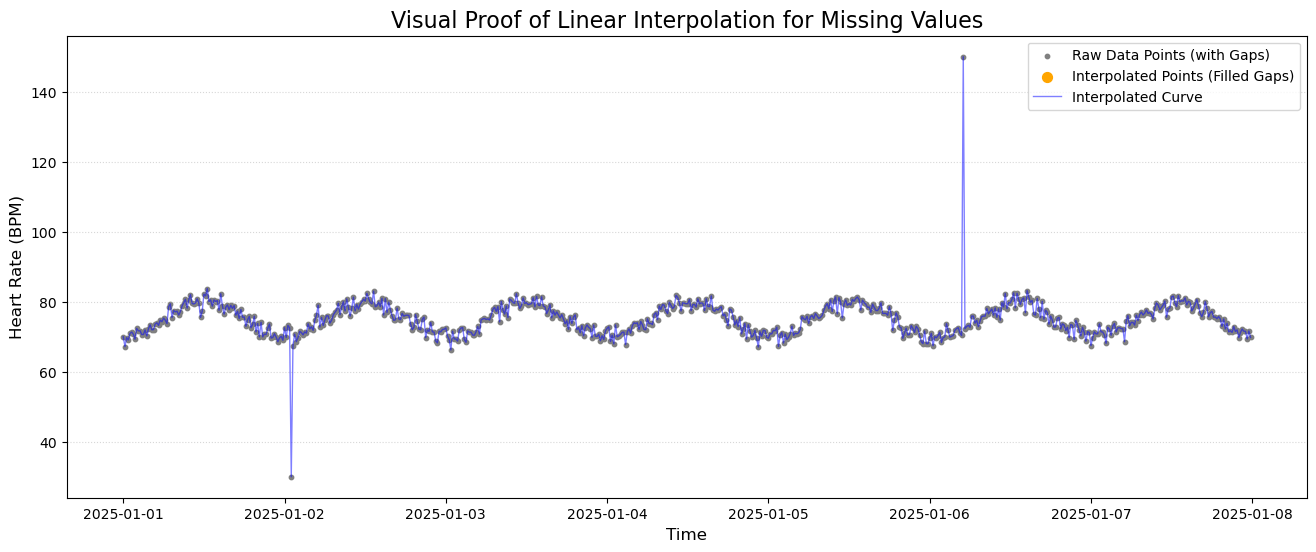

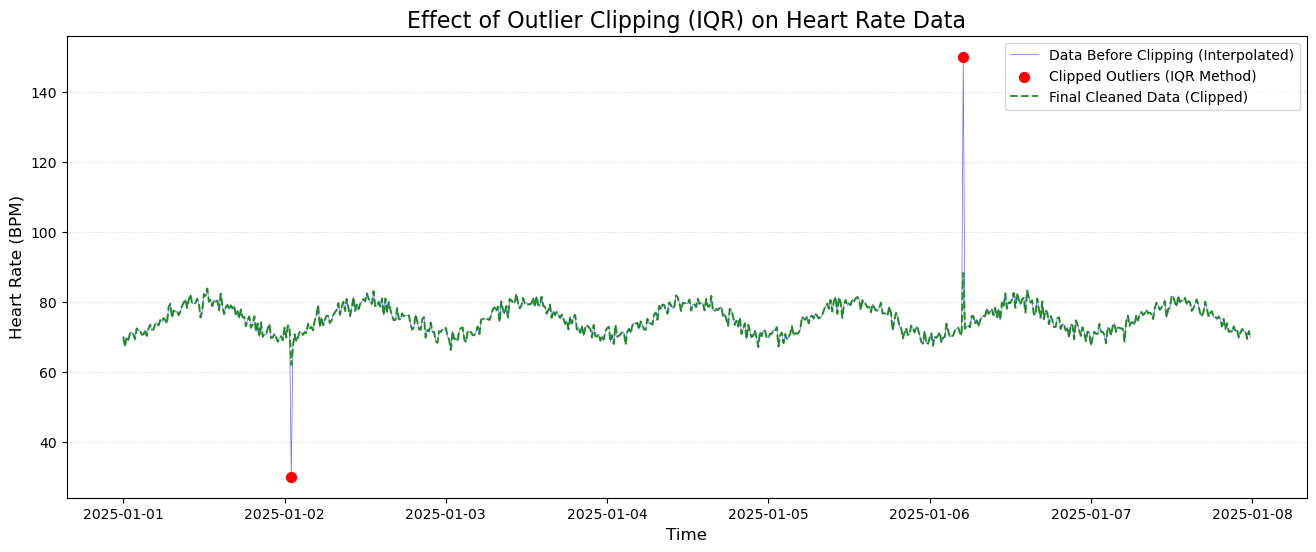

In [9]:
# ----------------------------------------------------------------------
## PLOT 1: Proof of Interpolation for Missing Values
# ----------------------------------------------------------------------

# Identify the original NaN locations from the raw data
missing_indices = df_raw[VALUE_COLUMN].isna()

plt.figure(figsize=(16, 6))

# Plot the raw data points (excluding NaNs)
plt.scatter(df_raw.index, df_raw[VALUE_COLUMN], 
            label='Raw Data Points (with Gaps)', 
            color='gray', s=10)

# Plot the interpolated points that filled the gaps
plt.scatter(df_interpolated.index[missing_indices], 
            df_interpolated[VALUE_COLUMN][missing_indices], 
            label='Interpolated Points (Filled Gaps)', 
            color='orange', s=50, zorder=5)

# Plot the full interpolated curve
plt.plot(df_interpolated.index, df_interpolated[VALUE_COLUMN], 
         label='Interpolated Curve', 
         color='blue', alpha=0.5, linewidth=1)


plt.title('Visual Proof of Linear Interpolation for Missing Values', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Heart Rate (BPM)', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.5)

# Save the plot
os.makedirs('../results', exist_ok=True)
plt.savefig(os.path.join('../results', 'interpolation_proof.png'))
plt.show()

# ----------------------------------------------------------------------
## PLOT 2: Proof of Outlier Clipping (IQR)
# ----------------------------------------------------------------------

# Identify points that were changed (clipped) by comparing interpolated vs. cleaned data
outlier_indices = df_interpolated[VALUE_COLUMN] != df_cleaned[VALUE_COLUMN]

plt.figure(figsize=(16, 6))

# Plot the data before clipping (Interpolated data)
plt.plot(df_interpolated.index, df_interpolated[VALUE_COLUMN], 
         label='Data Before Clipping (Interpolated)', 
         color='blue', alpha=0.6, linewidth=0.5)

# Highlight the points that were clipped/changed
plt.scatter(df_interpolated.index[outlier_indices], 
            df_interpolated[VALUE_COLUMN][outlier_indices], 
            label='Clipped Outliers (IQR Method)', 
            color='red', marker='o', s=50, zorder=5)

# Plot the final cleaned data (after clipping)
plt.plot(df_cleaned.index, df_cleaned[VALUE_COLUMN], 
         label='Final Cleaned Data (Clipped)', 
         color='green', alpha=0.8, linewidth=1.5, linestyle='--')

plt.title('Effect of Outlier Clipping (IQR) on Heart Rate Data', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Heart Rate (BPM)', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.5)

# Save the plot
plt.savefig(os.path.join('../results', 'outlier_clipping_proof.png'))
plt.show()